In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\Electric_Production.csv",parse_dates=["DATE"],index_col="DATE")
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


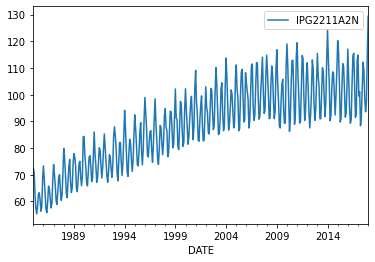

In [3]:
df.plot()

In [4]:
df.shape

(397, 1)

In [5]:
size=int(df.shape[0]*0.8)
size

317

In [6]:
train=df.iloc[:size]
train.shape
test=df.iloc[size:]
test.shape

(80, 1)

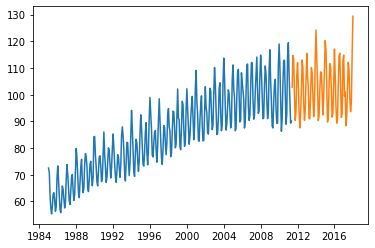

In [7]:
plt.plot(train)
plt.plot(test)

In [8]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
mx.fit(train)
sc_train=mx.transform(train)
sc_test=mx.transform(test)

## Create the LSTM model

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model=Sequential()
lstm_model.add(LSTM(200,activation='relu',input_shape=(10,1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.preprocessing.sequence import TimeseriesGenerator
gen=TimeseriesGenerator(sc_train,sc_train,length=10,batch_size=1)

In [11]:
lstm_model.fit_generator(gen,epochs=20)

C:\Users\Krishna\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
307/307 [==============================] - 6s 9ms/step - loss: 0.0338
Epoch 2/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0244
Epoch 3/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0210
Epoch 4/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0155
Epoch 5/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0123
Epoch 6/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0079
Epoch 7/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0058
Epoch 8/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0061
Epoch 9/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0058
Epoch 10/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0043
Epoch 11/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0057
Epoch 12/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0049
Epoch 13/20
307/307 [====

([<matplotlib.axis.XTick at 0x1bbaa0856d0>,
 <a list of 20 Text major ticklabel objects>)

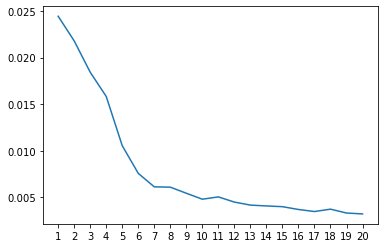

In [12]:
loss=lstm_model.history.history["loss"]
plt.plot(range(1,len(loss)+1),loss)
plt.xticks(range(1,len(loss)+1))

In [13]:
pred = []

batch = sc_train[-10:]
current_batch = batch.reshape((1, 10, 1))

for i in range(len(test)):   
    tpred = lstm_model.predict(current_batch)[0]
    pred.append(tpred) 
    current_batch = np.append(current_batch[:,1:,:],[[tpred]],axis=1)

In [14]:
lstm_predictions = mx.inverse_transform(pred)
lstm_predictions

array([[104.91799782],
       [116.74725154],
       [113.15076578],
       [102.64667667],
       [ 91.86502622],
       [ 92.20742135],
       [107.27281496],
       [120.4691056 ],
       [116.85038892],
       [106.50214955],
       [ 94.66799218],
       [ 93.8399785 ],
       [109.14970181],
       [123.504888  ],
       [120.75184216],
       [110.03230976],
       [ 97.43689266],
       [ 95.79886576],
       [111.27881318],
       [126.44067719],
       [124.16221475],
       [112.91117525],
       [ 99.70093865],
       [ 97.76632868],
       [113.88220961],
       [129.45196428],
       [126.99059021],
       [115.07850605],
       [101.38904631],
       [ 99.7009157 ],
       [116.76141935],
       [132.33411927],
       [129.20724059],
       [116.63889686],
       [102.58804702],
       [101.59924935],
       [119.68937875],
       [134.89587672],
       [130.77616498],
       [117.6113656 ],
       [103.3515482 ],
       [103.42202006],
       [122.48086588],
       [136

In [15]:
test_df=test
test_df['LSTM_Predictions'] = lstm_predictions
test_df.head()

<ipython-input-15-c1ea56a3f8a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['LSTM_Predictions'] = lstm_predictions


,IPG2211A2N,LSTM_Predictions
DATE,,
2011-06-01,102.8204,104.917998
2011-07-01,114.7068,116.747252
2011-08-01,113.5958,113.150766
2011-09-01,99.4712,102.646677
2011-10-01,90.3566,91.865026


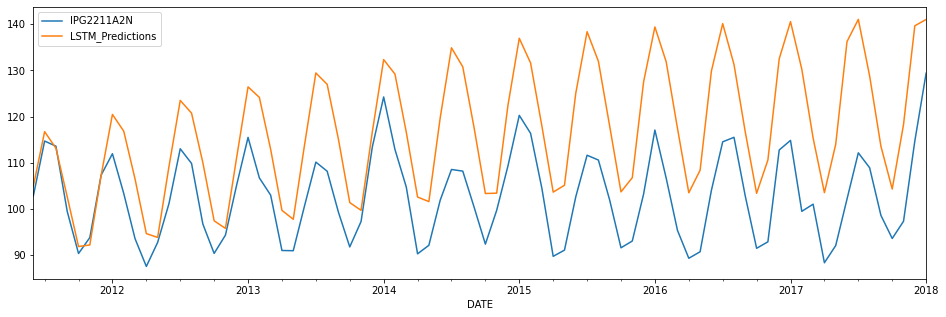

In [16]:
test_df['IPG2211A2N'].plot(figsize = (16,5), legend=True)
test_df['LSTM_Predictions'].plot(legend = True)

## Create the GRU model

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU

gru_model=Sequential()
gru_model.add(GRU(200,activation='relu',input_shape=(10,1)))
gru_model.add(Dense(1))
gru_model.compile(loss='mse')

gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 200)               121800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 122,001
Trainable params: 122,001
Non-trainable params: 0
_________________________________________________________________


In [18]:
from keras.preprocessing.sequence import TimeseriesGenerator
gen=TimeseriesGenerator(sc_train,sc_train,length=10,batch_size=1)

In [19]:
gru_model.fit_generator(gen,epochs=20)

C:\Users\Krishna\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
307/307 [==============================] - 6s 10ms/step - loss: 0.0282
Epoch 2/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0131
Epoch 3/20
307/307 [==============================] - 3s 10ms/step - loss: 0.0068
Epoch 4/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0053
Epoch 5/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0055
Epoch 6/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0049
Epoch 7/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0048
Epoch 8/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0043
Epoch 9/20
307/307 [==============================] - 3s 9ms/step - loss: 0.0037
Epoch 10/20
307/307 [==============================] - 3s 10ms/step - loss: 0.0039
Epoch 11/20
307/307 [==============================] - 3s 10ms/step - loss: 0.0033
Epoch 12/20
307/307 [==============================] - 3s 10ms/step - loss: 0.0043
Epoch 13/20
307/307 

([<matplotlib.axis.XTick at 0x1bbac4135b0>,
 <a list of 20 Text major ticklabel objects>)

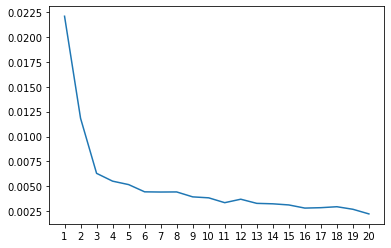

In [20]:
loss=gru_model.history.history["loss"]
plt.plot(range(1,len(loss)+1),loss)
plt.xticks(range(1,len(loss)+1))

In [21]:
pred = []

batch = sc_train[-10:]
current_batch = batch.reshape((1, 10, 1))

for i in range(len(test)):   
    tpred = gru_model.predict(current_batch)[0]
    pred.append(tpred) 
    current_batch = np.append(current_batch[:,1:,:],[[tpred]],axis=1)

In [22]:
gru_predictions = mx.inverse_transform(pred)
gru_predictions

array([[100.94470337],
       [108.4739156 ],
       [104.12414907],
       [ 94.9021206 ],
       [ 88.23366026],
       [ 89.37437175],
       [ 98.60477314],
       [105.04519829],
       [100.99915994],
       [ 92.41433106],
       [ 86.13489646],
       [ 87.59006144],
       [ 96.88208746],
       [102.61392317],
       [ 98.36680059],
       [ 90.37301116],
       [ 84.44209552],
       [ 86.04075549],
       [ 95.14365806],
       [100.50198224],
       [ 96.14772515],
       [ 88.5847764 ],
       [ 82.95104054],
       [ 84.67556988],
       [ 93.50687812],
       [ 98.57539712],
       [ 94.18100811],
       [ 86.98303731],
       [ 81.58979086],
       [ 83.36099288],
       [ 91.92293676],
       [ 96.80358692],
       [ 92.40752638],
       [ 85.52413147],
       [ 80.33326592],
       [ 82.07481652],
       [ 90.34021558],
       [ 95.13523923],
       [ 90.79920828],
       [ 84.17491907],
       [ 79.16780284],
       [ 80.79677213],
       [ 88.74119607],
       [ 93

In [23]:
test_df=test
test_df['GRU_Predictions'] = gru_predictions
test_df.head()

<ipython-input-23-1a34b4bb1d58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['GRU_Predictions'] = gru_predictions


,IPG2211A2N,LSTM_Predictions,GRU_Predictions
DATE,,,
2011-06-01,102.8204,104.917998,100.944703
2011-07-01,114.7068,116.747252,108.473916
2011-08-01,113.5958,113.150766,104.124149
2011-09-01,99.4712,102.646677,94.902121
2011-10-01,90.3566,91.865026,88.233660


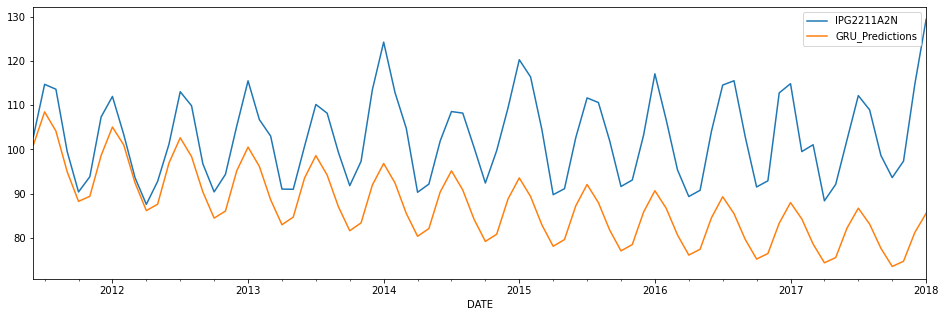

In [24]:
test_df['IPG2211A2N'].plot(figsize = (16,5), legend=True)
test_df['GRU_Predictions'].plot(legend = True)